In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.82 MiB | 33.18 MiB/s, done.
Resolving deltas: 100% (568/568), done.


In [0]:
!python setup.py install

In [0]:
!unzip annots_valApple.zip
!unzip annots_valBanana.zip
!unzip annots_valOrange.zip
!unzip annotsApple.zip
!unzip annotsBanana.zip
!unzip annotsOrange.zip
!unzip images_valApple.zip
!unzip images_valBanana.zip
!unzip images_valOrange.zip
!unzip imagesApple.zip
!unzip imagesBanana.zip
!unzip imagesOrange.zip

In [0]:
!unzip imagesOrange.zip

In [0]:
%tensorflow_version 1.x

In [9]:
!pip install q keras==2.2.5.

In [0]:
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN
import numpy as np
from numpy import zeros
from numpy import asarray
import colorsys
import argparse
import imutils
import random
import cv2
import os
import time
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from keras.models import load_model
%matplotlib inline
from os import listdir
from xml.etree import ElementTree

In [0]:
class AppleDataset(Dataset):
  def load_dataset(self, dataset_dir, is_train):
    self.add_class("dataset", 1, "Apple")
    if is_train == True:
      images_dir = dataset_dir + 'images' + 'Apple'
      annotations_dir = dataset_dir + 'annots' + 'Apple'
    else:
      images_dir = dataset_dir + 'images_val' + 'Apple'
      annotations_dir = dataset_dir + 'annots_val' + 'Apple'
    for filename in listdir(images_dir):
      image_id = filename[:-4]
      img_path = images_dir + '/' + filename
      ann_path = annotations_dir + '/' + image_id + '.xml'
      self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
  def extract_boxes(self, filename):
    tree = ElementTree.parse(filename)
    root = tree.getroot()
    boxes = list()
    for box in root.findall('.//bndbox'):
      xmin = int(box.find('xmin').text)
      ymin = int(box.find('ymin').text)
      xmax = int(box.find('xmax').text)
      ymax = int(box.find('ymax').text)
      coors = [xmin, ymin, xmax, ymax]
      boxes.append(coors)
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height
  def load_mask(self, image_id):
    info = self.image_info[image_id]
    path = info['annotation']
    boxes, w, h = self.extract_boxes(path)
    masks = zeros([h, w, len(boxes)], dtype='uint8')
    class_ids = list()
    for i in range(len(boxes)):
      box = boxes[i]
      row_s, row_e = box[1], box[3]
      col_s, col_e = box[0], box[2]
      masks[row_s:row_e, col_s:col_e, i] = 1
      class_ids.append(self.class_names.index('Apple'))
    return masks, asarray(class_ids, dtype='int32')
  def image_reference(self, image_id):
    info = self.image_info[image_id]
    print(info)
    return info['path']

In [0]:
class BananaDataset(Dataset):
  def load_dataset(self, dataset_dir, is_train):
    self.add_class("dataset", 1, "Banana")
    if is_train == True:
      images_dir = dataset_dir + 'images' + 'Banana'
      annotations_dir = dataset_dir + 'annots' + 'Banana'
    else:
      images_dir = dataset_dir + 'images_val' + 'Banana'
      annotations_dir = dataset_dir + 'annots_val' + 'Banana'
    for filename in listdir(images_dir):
      image_id = filename[:-4]
      img_path = images_dir + '/' + filename
      ann_path = annotations_dir + '/' + image_id + '.xml'
      self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
  def extract_boxes(self, filename):
    tree = ElementTree.parse(filename)
    root = tree.getroot()
    boxes = list()
    for box in root.findall('.//bndbox'):
      xmin = int(box.find('xmin').text)
      ymin = int(box.find('ymin').text)
      xmax = int(box.find('xmax').text)
      ymax = int(box.find('ymax').text)
      coors = [xmin, ymin, xmax, ymax]
      boxes.append(coors)
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height
  def load_mask(self, image_id):
    info = self.image_info[image_id]
    path = info['annotation']
    boxes, w, h = self.extract_boxes(path)
    masks = zeros([h, w, len(boxes)], dtype='uint8')
    class_ids = list()
    for i in range(len(boxes)):
      box = boxes[i]
      row_s, row_e = box[1], box[3]
      col_s, col_e = box[0], box[2]
      masks[row_s:row_e, col_s:col_e, i] = 1
      class_ids.append(self.class_names.index('Banana'))
    return masks, asarray(class_ids, dtype='int32')
  def image_reference(self, image_id):
    info = self.image_info[image_id]
    print(info)
    return info['path']

In [0]:
class OrangeDataset(Dataset):
  def load_dataset(self, dataset_dir, is_train):
    self.add_class("dataset", 1, "Orange")
    if is_train == True:
      images_dir = dataset_dir + 'images' + 'Orange'
      annotations_dir = dataset_dir + 'annots' + 'Orange'
    else:
      images_dir = dataset_dir + 'images_val' + 'Orange'
      annotations_dir = dataset_dir + 'annots_val' + 'Orange'
    for filename in listdir(images_dir):
      image_id = filename[:-4]
      img_path = images_dir + '/' + filename
      ann_path = annotations_dir + '/' + image_id + '.xml'
      self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
  def extract_boxes(self, filename):
    tree = ElementTree.parse(filename)
    root = tree.getroot()
    boxes = list()
    for box in root.findall('.//bndbox'):
      xmin = int(box.find('xmin').text)
      ymin = int(box.find('ymin').text)
      xmax = int(box.find('xmax').text)
      ymax = int(box.find('ymax').text)
      coors = [xmin, ymin, xmax, ymax]
      boxes.append(coors)
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height
  def load_mask(self, image_id):
    info = self.image_info[image_id]
    path = info['annotation']
    boxes, w, h = self.extract_boxes(path)
    masks = zeros([h, w, len(boxes)], dtype='uint8')
    class_ids = list()
    for i in range(len(boxes)):
      box = boxes[i]
      row_s, row_e = box[1], box[3]
      col_s, col_e = box[0], box[2]
      masks[row_s:row_e, col_s:col_e, i] = 1
      class_ids.append(self.class_names.index('Orange'))
    return masks, asarray(class_ids, dtype='int32')
  def image_reference(self, image_id):
    info = self.image_info[image_id]
    print(info)
    return info['path']

In [0]:
train_set_Apple = AppleDataset()
train_set_Apple.load_dataset('', is_train=True)
train_set_Apple.prepare()
print('Train: %d' % len(train_set_Apple.image_ids))

val_set_Apple = AppleDataset()
val_set_Apple.load_dataset('', is_train=False)
val_set_Apple.prepare()
print('Validation: %d' % len(val_set_Apple.image_ids))

Train: 1078
Validation: 46


In [0]:
class AppleConfig(Config):
    # give the configuration a recognizable name
    NAME = "Apple"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    IMAGES_PER_GPU = 1
 
    NUM_CLASSES = 1+1
   
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 1078
    
    # Learning rate
    LEARNING_RATE=0.001
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

    MAX_GT_INSTANCES=10
    

In [0]:
train_set_Banana = BananaDataset()
train_set_Banana.load_dataset('', is_train=True)
train_set_Banana.prepare()
print('Train: %d' % len(train_set_Banana.image_ids))

val_set_Banana = BananaDataset()
val_set_Banana.load_dataset('', is_train=False)
val_set_Banana.prepare()
print('Validation: %d' % len(val_set_Banana.image_ids))

Train: 723
Validation: 17


In [0]:
class BananaConfig(Config):
    # give the configuration a recognizable name
    NAME = "Banana"

    IMAGES_PER_GPU = 1
 
    NUM_CLASSES = 1+1
   
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 723
    
    # Learning rate
    LEARNING_RATE=0.001
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    
    # setting Max ground truth instances
    MAX_GT_INSTANCES=10

In [12]:
train_set_Orange = OrangeDataset()
train_set_Orange.load_dataset('', is_train=True)
train_set_Orange.prepare()
print('Train: %d' % len(train_set_Orange.image_ids))

val_set_Orange = OrangeDataset()
val_set_Orange.load_dataset('', is_train=False)
val_set_Orange.prepare()
print('Validation: %d' % len(val_set_Orange.image_ids))

Train: 900
Validation: 61


In [0]:
class OrangeConfig(Config):
    # give the configuration a recognizable name
    NAME = "Orange"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    IMAGES_PER_GPU = 1
 
    NUM_CLASSES = 1+1
   
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 900
    
    # Learning rate
    LEARNING_RATE=0.001
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    
    # setting Max ground truth instances
    MAX_GT_INSTANCES=10

In [0]:
print('Loading Mask R-CNN model...')
config = AppleConfig()
model = modellib.MaskRCNN(mode = 'training', config = config, model_dir='./')

Loading Mask R-CNN model...






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [0]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [0]:
model.load_weights('mask_rcnn_coco.h5',by_name=True, exclude=['mrcnn_class_logits',
                                                              'mrcnn_bbox_fc',
                                                              'mrcnn_bbox',
                                                              'mrcnn_mask'])

In [0]:
model.train(train_set_Apple,val_set_Apple, learning_rate=config.LEARNING_RATE, epochs = 20, layers = 'heads')
history = model.keras_model.history.history


Starting at epoch 0. LR=0.001

Checkpoint Path: ./apple20200415T0300/mask_rcnn_apple_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistribut

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "






Epoch 1/20
1078/1078 [==============================] - 580s 538ms/step - loss: 0.9701 - rpn_class_loss: 0.0491 - rpn_bbox_loss: 0.3042 - mrcnn_class_loss: 0.1101 - mrcnn_bbox_loss: 0.2543 - mrcnn_mask_loss: 0.2525 - val_loss: 0.8060 - val_rpn_class_loss: 0.0202 - val_rpn_bbox_loss: 0.4182 - val_mrcnn_class_loss: 0.0631 - val_mrcnn_bbox_loss: 0.1398 - val_mrcnn_mask_loss: 0.1647

Epoch 2/20
1078/1078 [==============================] - 542s 502ms/step - loss: 0.7901 - rpn_class_loss: 0.0401 - rpn_bbox_loss: 0.2773 - mrcnn_class_loss: 0.0976 - mrcnn_bbox_loss: 0.1529 - mrcnn_mask_loss: 0.2223 - val_loss: 0.8853 - val_rpn_class_loss: 0.0240 - val_rpn_bbox_loss: 0.4689 - val_mrcnn_class_loss: 0.0906 - val_mrcnn_bbox_loss: 0.1348 - val_mrcnn_mask_loss: 0.1670
Epoch 3/20
1078/1078 [==============================] - 543s 504ms/step - loss: 0.7403 - rpn_class_loss: 0.0369 - rpn_bbox_loss: 0.2577 - mrcnn_class_loss: 0.0979 - mrcnn_bbox_loss: 0.1366 - mrcnn_mask_loss: 0.2111 - val_loss: 0.78

In [0]:
import time
model_path = 'mask_rcnn_' + '.' + str(time.time()) + 'addApple' + '.h5'
model.keras_model.save_weights(model_path)



Instructions for updating:
Use `tf.cast` instead.
Processing 1 images
image                    shape: (683, 1024, 3)        min:    0.00000  max:  245.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  140.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


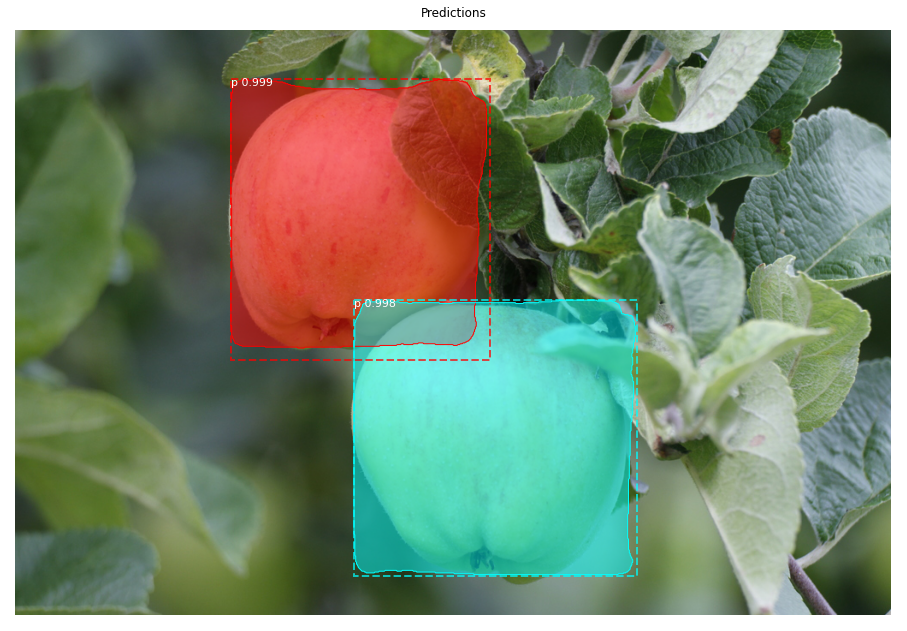

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
model.load_weights(model_path, by_name=True)
img = load_img("images_valApple/078821d86db99fc9.jpg")
img = img_to_array(img)
result= model.detect([img], verbose=1)

r = result[0]
visualize.display_instances(img, boxes = r['rois'], masks = r['masks'], class_ids = r['class_ids'],
                            class_names = 'Apple', scores = r['scores'],
                            title="Predictions")

In [0]:
modp = '/content/drive/My Drive/Appleweight.h'
model.keras_model.save_weights(modp)

In [0]:
print('Loading Mask R-CNN model...')
config = BananaConfig()
model = modellib.MaskRCNN(mode = 'training', config = config, model_dir='./')

Loading Mask R-CNN model...


In [0]:
model.load_weights(model_path,by_name=True, exclude=['mrcnn_class_logits',
                                                              'mrcnn_bbox_fc',
                                                              'mrcnn_bbox',
                                                              'mrcnn_mask'])
model.train(train_set_Banana,val_set_Banana, learning_rate=config.LEARNING_RATE, epochs = 20, layers = 'heads')
history = model.keras_model.history.history


Starting at epoch 0. LR=0.001

Checkpoint Path: ./banana20200415T0605/mask_rcnn_banana_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistrib

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/20
723/723 [==============================] - 392s 542ms/step - loss: 1.3528 - rpn_class_loss: 0.0405 - rpn_bbox_loss: 0.5911 - mrcnn_class_loss: 0.1031 - mrcnn_bbox_loss: 0.3292 - mrcnn_mask_loss: 0.2888 - val_loss: 1.2741 - val_rpn_class_loss: 0.0244 - val_rpn_bbox_loss: 0.7797 - val_mrcnn_class_loss: 0.0682 - val_mrcnn_bbox_loss: 0.2107 - val_mrcnn_mask_loss: 0.1912
Epoch 2/20
723/723 [==============================] - 370s 511ms/step - loss: 1.0808 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.4531 - mrcnn_class_loss: 0.0878 - mrcnn_bbox_loss: 0.2470 - mrcnn_mask_loss: 0.2639 - val_loss: 1.2327 - val_rpn_class_loss: 0.0128 - val_rpn_bbox_loss: 0.7213 - val_mrcnn_class_loss: 0.0659 - val_mrcnn_bbox_loss: 0.2444 - val_mrcnn_mask_loss: 0.1883
Epoch 3/20
723/723 [==============================] - 370s 512ms/step - loss: 0.9800 - rpn_class_loss: 0.0263 - rpn_bbox_loss: 0.4010 - mrcnn_class_loss: 0.0775 - mrcnn_bbox_loss: 0.2183 - mrcnn_mask_loss: 0.2569 - val_loss: 1.1628 - val_rp

In [0]:
import time
model_path = 'mask_rcnn_' + '.' + str(time.time()) + 'addBanana' + '.h5'
model.keras_model.save_weights(model_path)

In [0]:
modp = '/content/drive/My Drive/Bananaweight.h'
model.keras_model.save_weights(modp)

In [14]:
print('Loading Mask R-CNN model...')
config = OrangeConfig()
model = modellib.MaskRCNN(mode = 'training', config = config, model_dir='./')

Loading Mask R-CNN model...






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [15]:
model.load_weights('Bananaweight.h',by_name=True, exclude=['mrcnn_class_logits',
                                                              'mrcnn_bbox_fc',
                                                              'mrcnn_bbox',
                                                              'mrcnn_mask'])
model.train(train_set_Orange,val_set_Orange, learning_rate=config.LEARNING_RATE, epochs = 20, layers = 'heads')
history = model.keras_model.history.history








Starting at epoch 0. LR=0.001

Checkpoint Path: ./orange20200415T0922/mask_rcnn_orange_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeD

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "






Epoch 1/20
900/900 [==============================] - 315s 350ms/step - loss: 1.0326 - rpn_class_loss: 0.0654 - rpn_bbox_loss: 0.3346 - mrcnn_class_loss: 0.1491 - mrcnn_bbox_loss: 0.2299 - mrcnn_mask_loss: 0.2535 - val_loss: 1.0171 - val_rpn_class_loss: 0.0314 - val_rpn_bbox_loss: 0.5302 - val_mrcnn_class_loss: 0.0978 - val_mrcnn_bbox_loss: 0.1768 - val_mrcnn_mask_loss: 0.1809

Epoch 2/20
900/900 [==============================] - 286s 318ms/step - loss: 0.8323 - rpn_class_loss: 0.0408 - rpn_bbox_loss: 0.2471 - mrcnn_class_loss: 0.1399 - mrcnn_bbox_loss: 0.1698 - mrcnn_mask_loss: 0.2347 - val_loss: 1.0705 - val_rpn_class_loss: 0.0274 - val_rpn_bbox_loss: 0.5423 - val_mrcnn_class_loss: 0.1280 - val_mrcnn_bbox_loss: 0.1594 - val_mrcnn_mask_loss: 0.2133
Epoch 3/20
900/900 [==============================] - 289s 321ms/step - loss: 0.7693 - rpn_class_loss: 0.0363 - rpn_bbox_loss: 0.2202 - mrcnn_class_loss: 0.1296 - mrcnn_bbox_loss: 0.1565 - mrcnn_mask_loss: 0.2267 - val_loss: 0.9534 - v

In [0]:
import time
model_path = 'mask_rcnn_' + '.' + str(time.time()) + 'addOrange' + '.h5'
model.keras_model.save_weights(model_path)

In [0]:
modp = '/content/drive/My Drive/Orangeweight.h'
model.keras_model.save_weights(modp)